This is a data set from Pymaceuticals Inc which specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Using Pandas to read two datas
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

In [7]:
#Merge two data sets into one data set
full_data = pd.merge(clinical_data,mouse_data, on="Mouse ID",how = "inner")
full_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
G_D_T_M= full_data.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean"})
G_D_T_M.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'}, inplace=True)
G_D_T_M_wide = G_D_T_M['Avg Tumor Volume (mm3)'].unstack('Drug')
G_D_T_M_wide

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
G_D_T_SE= full_data.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"sem"})
G_D_T_SE.rename(columns={'Tumor Volume (mm3)': 'SEM Tumor Volume (mm3)'}, inplace=True)
G_D_T_SE_wide = G_D_T_SE['SEM Tumor Volume (mm3)'].unstack('Drug')
G_D_T_SE_wide

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


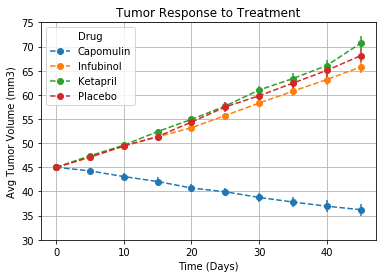

In [30]:
# Generate the Plot (with Error Bars)

G_D_T_M_wide[["Capomulin","Infubinol","Ketapril","Placebo"]].plot(title ="Tumor Response to Treatment", 
                                                                  ylim =[30,75],
                                                                  grid = True,
                                                                  marker ="o",
                                                                  linestyle='--',
                                                                  yerr = G_D_T_SE_wide[["Capomulin","Infubinol","Ketapril","Placebo"]],
                                                                  )
plt.xlabel("Time (Days)")
plt.ylabel('Avg Tumor Volume (mm3)')

plt.savefig("../result1.png")


## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
G_D_M_M= full_data.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"mean"})
G_D_M_M.rename(columns={'Metastatic Sites': 'Avg Metastatic Sites'}, inplace=True)
G_D_M_M_wide = G_D_M_M['Avg Metastatic Sites'].unstack('Drug')
G_D_M_M_wide

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
G_D_M_SE= full_data.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"sem"})
G_D_M_SE.rename(columns={'Metastatic Sites': 'SEM Metastatic Sites'}, inplace=True)
G_D_M_SE_wide = G_D_M_SE['SEM Metastatic Sites'].unstack('Drug')
G_D_M_SE_wide

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


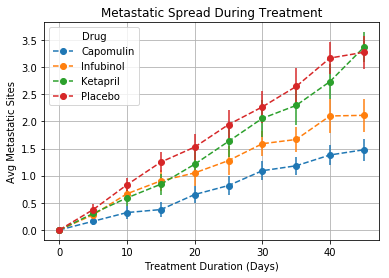

In [36]:
# Generate the Plot (with Error Bars)
G_D_M_M_wide[["Capomulin","Infubinol","Ketapril","Placebo"]].plot(title ="Metastatic Spread During Treatment", 
                                                                  grid = True,
                                                                  marker ="o",
                                                                  linestyle='--',
                                                                  yerr = G_D_M_SE_wide[["Capomulin","Infubinol","Ketapril","Placebo"]],
                                                                  )
plt.xlabel("Treatment Duration (Days)")
plt.ylabel('Avg Metastatic Sites')

plt.savefig("../result2.png")


## Survival Rates

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
G_D_C= full_data.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"count"})
# Calculate the Survival Rate
perc = lambda x : (x/x[0])*100
G_D_C = G_D_C.transform(perc)

G_D_C.rename(columns={'Mouse ID': 'Mouse sur rate'}, inplace=True)
G_D_C_wide = G_D_C['Mouse sur rate'].unstack('Drug')
G_D_C_wide

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


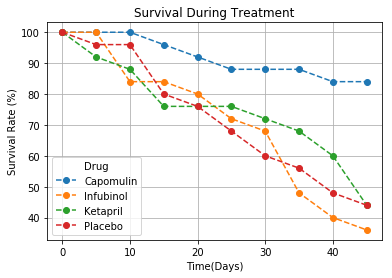

In [52]:
# Generate the Plot (Accounting for percentages)
G_D_C_wide[["Capomulin","Infubinol","Ketapril","Placebo"]].plot(title ="Survival During Treatment", 
                                                                  grid = True,
                                                                  marker ="o",
                                                                  linestyle='--')
plt.xlabel("Time(Days)")
plt.ylabel('Survival Rate (%)')

plt.savefig("../result3.png")


## Bar Graph for Tumor Change Over 45 Days Treatment

In [66]:
# Calculate the percent changes for each drug
Time_len = G_D_T_M_wide.shape[0]
Tum_change = ((G_D_T_M_wide.iloc[(Time_len-1)]/G_D_T_M_wide.iloc[0])-1)*100
Tum_change_4 = tuple(Tum_change[["Capomulin","Infubinol","Ketapril","Placebo"]])
Tum_change_4

(-19.475302667894155, 46.12347172785185, 57.02879468660604, 51.29796048315151)

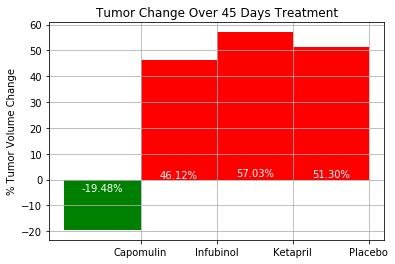

In [105]:
ind = np.arange(4)
width = 1

fig, ax = plt.subplots()

#Plot two bar chart for success and fail drug
rects1 = ax.bar(ind[0]-width,Tum_change_4[0],width,color="g")
rects2 = ax.bar(ind[1:4]-width,Tum_change_4[1:4],width,color="r")

plt.xticks(ind-width/2,("Capomulin","Infubinol","Ketapril","Placebo"))
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()
 
# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.08*height,
                '%s' % '{:,.2f}%'.format(height),
                ha='center', va='top',color = "w")

autolabel(rects1)
autolabel(rects2)

plt.savefig("../result4.png")

## Summary

* According to Tumor Response to Treatment figure, we can see that Capomulin drug has a well treatment on mice. The average tumor volume was from 45 mm3 to around 35 mm3. However, Infubinol, Ketapril, and Placebo treatment couldn’t reduce tumor volume. They increased around 20 mm3 during 45 days.

* According to Metastatic Spread during treatment figure, we can see that Capomulin treatment group has  less spreading-sites during 45 days treatment. 

* According to survival during treatment figure, we can see that the mice of Capomulin treatment group has highest survival rate 85% than Infubinol, Ketapril, and Placebo treatment groups which is around 45% survival rate. 

* According to Tumor change Over 45 days treatment figure, we can see that Capomulin treatment group has shorten tumor volume around 20% during 45 days treatment. However, the other three groups(Infubinol, Ketapril, and Placebo) already increased tumor size around 50% during treatment.


In short, Capomulin drug has a well effect of treatment on tumor. Pymaceuticals Inc can keep doing research and development on this drug.